In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 生成数据

In [14]:
x = np.random.randn(2000).reshape(-1, 2) 
tar_w = [-2.1, 2.3, 42.0]

In [15]:
x = np.hstack([x, np.ones(shape=(x.shape[0], 1))])
x.shape

(1000, 3)

In [16]:
y = x @ tar_w + np.random.normal(0, 1, size=x.shape[0])

## 最小二乘法

In [28]:
theta = np.linalg.inv(x.T @ x) @ x.T @ y
theta

array([-2.13378265,  2.26794792, 41.97486353])

## 初始化参数

In [17]:
w = np.random.randn(3)
w

array([-0.83472103, -1.20699179,  1.80448109])

## 设定学习率

In [18]:
alpha = 0.1

## 梯度下降

In [19]:
y_hat = x @ w
J = 1/2 * ((y_hat - y) ** 2).mean()
Jw = ((y_hat - y).reshape(-1, 1) * x ).mean(axis=0)
Jw

array([  0.48978112,  -1.94344013, -40.02443322])

In [20]:
epochs = 50

In [21]:
loss_lst = []
for epoch in range(epochs):
    y_hat = x @ w
    J = 1/2 * ((y_hat - y) ** 2).mean()
    loss_lst.append(J)
    Jw = ((y_hat - y).reshape(-1, 1) * x ).mean(axis=0)
    w = w - alpha * Jw

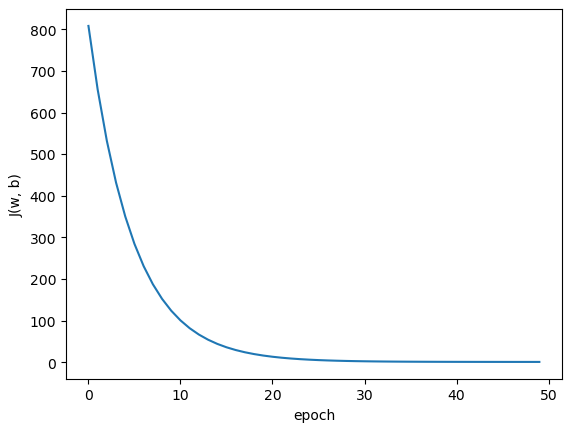

In [27]:
plt.plot(range(epochs), loss_lst)
plt.xlabel('epoch')
plt.ylabel('J(w, b)')
plt.show()

In [23]:
w, tar_w

(array([-2.1027103 ,  2.20013948, 41.75788182]), [-2.1, 2.3, 42.0])

In [26]:
np.all(np.abs(w - tar_w) < 0.3)

True